# **AP155 Lab Assignment** 
## Module 5: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 25, 25, and 50 points, respectively).

_Due Date_: **5PM of December 7 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Vertudez, Genesis\
_Student No._: 202003099\
_Section_: HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** GENESIS R. VERTUDEZ

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/25
* Problem 2 - []/25
* Problem 3 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (25 pts.; 50/50 for code & discussion) 
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits. 

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(15 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$. 

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(10 pts.)*

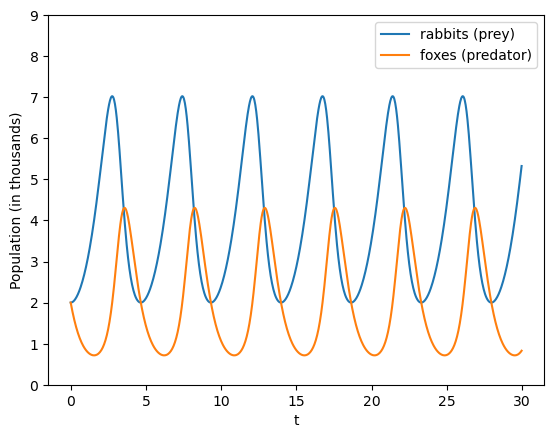

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def f(r,t):
    x = r[0]
    y = r[1]
    fx = x - 0.5*x*y
    fy = 0.5*x*y - 2*y
    return np.array([fx, fy], float)

a = 0
b = 30
N = 1000
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

r = np.array([2.0,2.0],float)

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1 + 2*k2 + 2*k3 + k4)/6
    
fig, ax = plt.subplots()
ax.plot(tpoints, xpoints, label='rabbits (prey)')
ax.plot(tpoints, ypoints, label='foxes (predator)')
ax.set_xlabel('t')
ax.set_ylabel('Population (in thousands)')
ax.set_ylim(0,9)
ax.legend()
plt.show()

### PROBLEM 2 (25 pts.; 50/50 for code & discussion)

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(15 pts.)*

2. Make a graph of $\theta$ as a function of time. *(10 pts.)*


(0.0, 10.0)

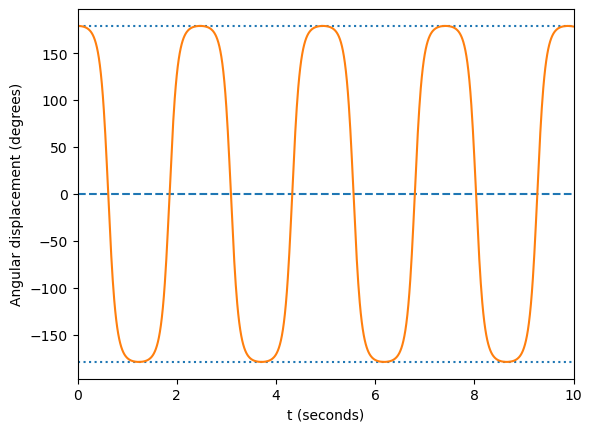

In [48]:
from numpy import sin, pi

g = 9.81
l = 0.1

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*sin(theta)
    return np.array([ftheta,fomega],float)

a = 0
b = 10
N = 1000
h = (b-a)/N

tpoints = np.arange(a,b,h)
thetapoints = []
# omegapoints = []

r = np.array([(179*pi)/180,0],float)

for t in tpoints:
    thetapoints.append(r[0])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1 + 2*k2 + 2*k3 + k4)/6
    
thetapoints = np.array(thetapoints)
thetapoints = thetapoints*180/pi

min, max = 0, 0
for i in range(len(thetapoints)):
    if thetapoints[i] > max:
        max = thetapoints[i]
    if thetapoints[i] < min:
        min = thetapoints[i]
    
fig, ax = plt.subplots()
ax.axhline(y=max, linestyle = 'dotted', color = '#1f77b4')
ax.axhline(y =0, linestyle = '--', color = '#1f77b4')
ax.axhline(y=min, linestyle = 'dotted', color = '#1f77b4')
ax.plot(tpoints, thetapoints, color = '#ff7f0e')
ax.set_xlabel('t (seconds)')
ax.set_ylabel('Angular displacement (degrees)')
ax.set_xlim(0,10)

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Quantum Oscillators**

_Refer to Exercise 8.14 of the Newman text_ Consider the one-dimensional, time-independent Schrodinger equation in a harmonic (i.e., quadratic) potential $V(x) = V_0 x^2 / a^2$, where $V_0$ and $a$ are constants. 

1. Modify the code from Example 8.9 to find the energies of the ground state and the first two excited states for this potential when $m$ is the electron mass, $V_0 = 50$ eV, and $a = 10^{-11}$ m. Note that in theory the wavefunction goes all the way out to $x = \pm \infty$, but you can get good answers by using a large but finite interval. Try using $x = - 10a$ to $+10a$, with the wavefunction $\psi = 0$ at both boundaries. (In effect, you are putting the harmonic oscillator in a box with impenetrable walls.) The wavefunction is real everywhere, so you don't need to use complex variables, and you can use evenly spaced points for the solution-- there is no need to use an adaptive method for this problem.

   The quantum harmonic oscillator is known to have energy states that are equally spaced. Check that this is true, to the precision of your calculation, for your answers. (Hint: The ground state has energy in the range 100 to 200eV.) *(20 pts.)*

2. Modify the code from (1) to calculate the same three energies for the anharmonic oscillator with $V(x) = V_0 x^4 /a^4$, with the same parameter values. *(10 pts.)*

3. Calculate the properly normalized wavefunctions of the anharmonic oscillator for the three states. To normalize the wavefunctions you will have to calculate the value of the integral $\int_{-\infty}^{+\infty} |\psi(x)|^2 {\rm d}x$ and then rescale $\psi$ appropriately to ensure that the area under the square of each of the wavefunctions is 1. Either the trapezoidal rule or Simpson's rule will give you a reasonable value for the integral. *(15 pts.)*

   Note that you may find a few very large values at the end of the array holding the wavefunction. Where do these large values come from? Are they real, or spurious? One simple way to deal with the large values is to make use of the fact that the system is symmetric about its midpoint and calculate the integral of the wavefunction over only the left-hand half of the system, then double the result. This neatly misses out the large values. 

4. Make a plot of the normalized wavefunctions from (3), all on the same axes, as a function of $x$ over a modest range near the origin-- say $x = -5a$ to $x =+5a$. *(5 pts.)*



In [94]:
# set constants

m = 9.1094e-31
hbar = 1.0546e-34
e = 1.6022e-19
V0 = 50.0*e
a = 1.0e-11

bound1 = -10*a
bound2 = 10*a
N = 1000
h = (bound2 - bound1)/N


xpoints = np.arange(bound1, bound2, h)



def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return np.array([fpsi,fphi],float)

def solve(E):
    psi = 0.0
    phi = 1.0
    r = np.array([psi,phi] ,float)
    for x in np.arange(bound1,bound2,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6
    return r[0]

In [95]:
# Main program to find the energy using the secant method

def V(x):
    return (V0*(x**2))/(a**2)

# Ground state
E1 = 0.0
E2 = e
psi2 = solve(E1)
target = e/1000
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1) 
GS = E2/e


# First excited state
E1 = 140 * e
E2 = 300 * e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2) > target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2, E2 - psi2*(E2 - E1) / (psi2 -psi1)
FE = E2/e


# Second excited state
E1 = 420 * e
E2 = 700 * e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2) > target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2, E2 - psi2*(E2 - E1) / (psi2 -psi1)
SE = E2/e

print("The ground state energy is", GS, "eV")
print("The first excited state energy is ", FE, "eV")
print("The second excited state energy is ", SE, "eV")

The ground state energy is 138.02397130603683 eV
The first excited state energy is  414.07191654124284 eV
The second excited state energy is  690.1198621200641 eV


In [96]:
# different potential

def V2(x):
    return (V0*(x**4))/(a**4)

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V2(x)-E)*psi
    return np.array([fpsi,fphi],float)

def solve(E):
    psi = 0.0
    phi = 1.0
    r = np.array([psi,phi] ,float)
    for x in np.arange(bound1,bound2,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6
    return r[0]

# Ground state
E1 = 0.0
E2 = e
psi2 = solve(E1)
target = e/1000
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)
GS2 = E2/e


# First excited state
E1 = 0 * e
E2 = 400 * e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2) > target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2, E2 - psi2*(E2 - E1) / (psi2 -psi1)
FE2 = E2/e



# Second excited state
E1 = 0 * e
E2 = 1500 * e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2) > target:
    psi1,psi2 = psi2,solve(E2)
    E1,E2 = E2, E2 - psi2*(E2 - E1) / (psi2 -psi1)
SE2 = E2/e

print("The ground state energy is", GS2, "eV")
print("The first excited state energy is ", FE2, "eV")
print("The first excited state energy is = ", SE2, "eV")

The ground state energy is 205.30690346934932 eV
The first excited state energy is  735.691247040332 eV
The first excited state energy is =  1443.5694213261647 eV


In [97]:
lbound = -5*a
ubound = 5*a
N = 1000
h = (ubound-lbound)/N

In [101]:
# # Simpsons

# def simpsons(f, a, b, N):
#     h = (b-a)/N
#     s = f(a) + f(b)
#     for k in range(1,N):   
#         if k % 2 == 1:         # for odd sum indices
#             s += 4*f(a+k*h)
#         else:                  # for even sum indices
#             s += 2*f(a+k*h)
#         I_simp = (h/3)*s
        
# simpsons(solve(GS2), lbound, ubound, N)